In [14]:
# import add-ons
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from scipy import stats
import netCDF4
from dateutil import parser
# Set All Fontsizes to 14
plt.rcParams.update({'font.size': 12})

In [15]:
# Store Filepaths
dabob_fp = 'data/ORCA_Dabobbay-H1_Oxygen.csv'
hansville_fp = 'data/ORCA_Hansville-H1_Oxygen.csv'
hoodsport_fp = 'data/ORCA_Hoodsport-H1_Oxygen.csv'
twanoh_fp = 'data/ORCA_Twanoh-H1_Oxygen.csv'

In [16]:
# Open and Read Data
dabob_df = pd.read_csv(dabob_fp,header = 0)
hansville_df = pd.read_csv(hansville_fp,header = 0)
hoodsport_df = pd.read_csv(hoodsport_fp,header = 0)
twanoh_df = pd.read_csv(twanoh_fp,header = 0)

# Convert Units to String
dabob_df[' Depth (Ft)'].astype(str)  
# Create List for unitless depths
dabob_df_d = []
# Dabob Remove units and add to list
for x in dabob_df[' Depth (Ft)']:
    dabob_df_new = x.split(' ')
    dabob_df_d.append(dabob_df_new[1])
dabob_df['Depth'] = dabob_df_d    
dabob_df['Depth'] = dabob_df['Depth'].astype(int)

# Hansville Convert Units to String
hansville_df[' Depth (Ft)'].astype(str)  
# Create List for unitless depths
hansville_df_d = []
# Remove units and add to list
for x in hansville_df[' Depth (Ft)']:
    hansville_df_new = x.split(' ')
    hansville_df_d.append(hansville_df_new[1])
hansville_df['Depth'] = hansville_df_d
hansville_df['Depth'] =hansville_df['Depth'].astype(int)

# Hoodsport Convert Units to String
hoodsport_df[' Depth (Ft)'].astype(str)  
# Create List for unitless depths
hoodsport_df_d = []
# Remove units and add to list
for x in hoodsport_df[' Depth (Ft)']:
    hoodsport_df_new = x.split(' ')
    hoodsport_df_d.append(hoodsport_df_new[1])
hoodsport_df['Depth'] = hoodsport_df_d 
hoodsport_df['Depth'] =hoodsport_df['Depth'].astype(int)

# Twanoh Convert Units to String
twanoh_df[' Depth (Ft)'].astype(str)  
# Create List for unitless depths
twanoh_df_d = []
# Remove units and add to list
for x in twanoh_df[' Depth (Ft)']:
    twanoh_df_new = x.split(' ')
    twanoh_df_d.append(twanoh_df_new[1])
twanoh_df['Depth'] = twanoh_df_d 
twanoh_df['Depth'] =twanoh_df['Depth'].astype(int)

# Clean DF
# Find Indeces for Oct 13, 2023
dabob_inds = np.where(dabob_df['Date and Time']=='2023-10-13T12:17:00-0700')
hansville_inds = np.where(hansville_df['Date and Time']=='2023-10-13T12:20:16-0700')
hoodsport_inds = np.where(hoodsport_df['Date and Time']=='2023-10-13T12:19:59-0700')
twanoh_inds = np.where(twanoh_df['Date and Time']=='2023-10-13T12:08:54-0700')

# Create Data Frames for Oct 13, 2023
dabob10_13 = dabob_df.loc[dabob_inds]
hansville10_13 = hansville_df.loc[hansville_inds]
hoodsport10_13 = hoodsport_df.loc[hoodsport_inds]
twanoh10_13 = twanoh_df.loc[twanoh_inds]

In [17]:
# Sort Values by Depth
dabob10_13 = dabob10_13.sort_values('Depth',ascending = False)

hoodsport10_13 = hoodsport10_13.sort_values('Depth',ascending = False)

hansville10_13 = hansville10_13.sort_values('Depth',ascending = False)

twanoh10_13 = twanoh10_13.sort_values('Depth',ascending = False)

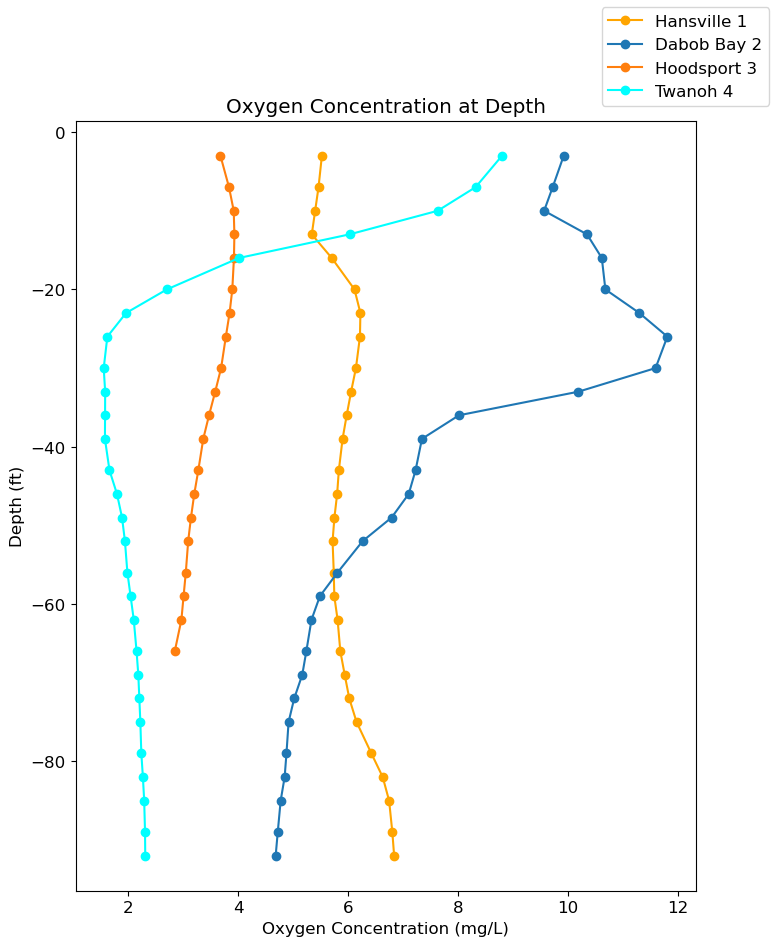

In [18]:
# Oxygen Depth Profiles

# Create Plot
fig,axs = plt.subplots(figsize = (8,10))

# Plot Data
axs.plot(hansville10_13[' Oxygen Conc. (mg/L)'],hansville10_13['Depth'],label = 'Hansville 1',color = 'orange',marker = 'o')
axs.plot(dabob10_13[' Oxygen Conc. (mg/L)'],dabob10_13['Depth'],label = 'Dabob Bay 2',marker = 'o')
axs.plot(hoodsport10_13[' Oxygen Conc. (mg/L)'],hoodsport10_13['Depth'],label = 'Hoodsport 3',marker = 'o')
axs.plot(twanoh10_13[' Oxygen Conc. (mg/L)'],twanoh10_13['Depth'],label = 'Twanoh 4',color = 'Cyan',marker = 'o')

# Adds Axis and Figure Titles
axs.set_xlabel('Oxygen Concentration (mg/L)')
axs.set_ylabel('Depth (ft)')
axs.set_title('Oxygen Concentration at Depth')

# Add Other Required Features
fig.legend()
# Save png of plot
#plt.savefig('depth_profile.png')

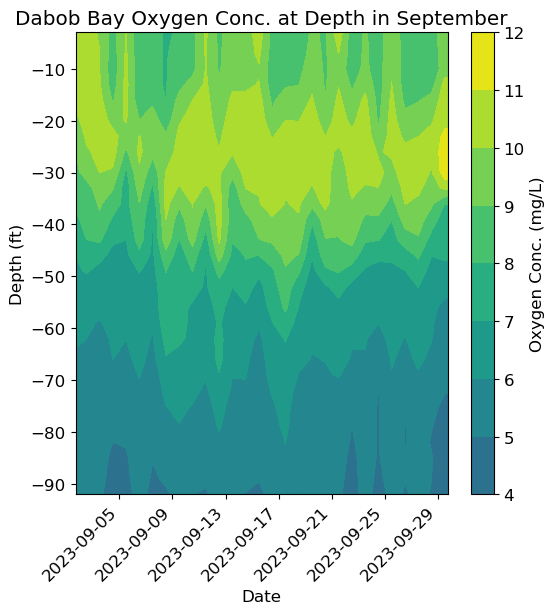

In [19]:
# Dabob Bay Dissolved Oxygen Over Time and Depth

# Convert Datetime strings to Datetimes
# Create Empty List for Datetimes
datetimes = []
# Convert String to Datetime Object
for date in dabob_df['Date and Time']:
    datetimes.append(parser.parse(date))
# Subsets Datetimes to Dataframe
dabob_df['Datetime'] = datetimes

# Convert Depth to Int
dabob_df['Depth']= dabob_df['Depth'].astype(int)

# Create 2d Array of O2 Conc.
piv = pd.pivot_table(dabob_df, index='Depth', columns='Datetime', values=' Oxygen Conc. (mg/L)',sort = True)
piv_new = piv.to_numpy()
#display(piv)
# Set X and Y
x= piv.columns
y= piv.index.values
X,Y = np.meshgrid(x,y)

#Plot 
fig,axs = plt.subplots(figsize = (6,6))
plt.contourf(X,Y,piv_new,vmin = 0,vmax = 12) # Added Vmin and Vmax to better compare the 4 plots against eachother.
# Set Axis Labels and Title
axs.set_xlabel('Date')
axs.set_ylabel('Depth (ft)')
axs.set_title('Dabob Bay Oxygen Conc. at Depth in September')
# Tilt X Tic Values
plt.xticks(rotation=45, ha='right')
# Set X-Limits based on known dataset
axs.set_xlim(left = datetime.fromisoformat('2023-09-02'), right = datetime.fromisoformat('2023-09-30'))
plt.show
# Add Color Bar
plt.colorbar(label = 'Oxygen Conc. (mg/L)')
# Save .png of plot
#plt.savefig('Dabob.png')

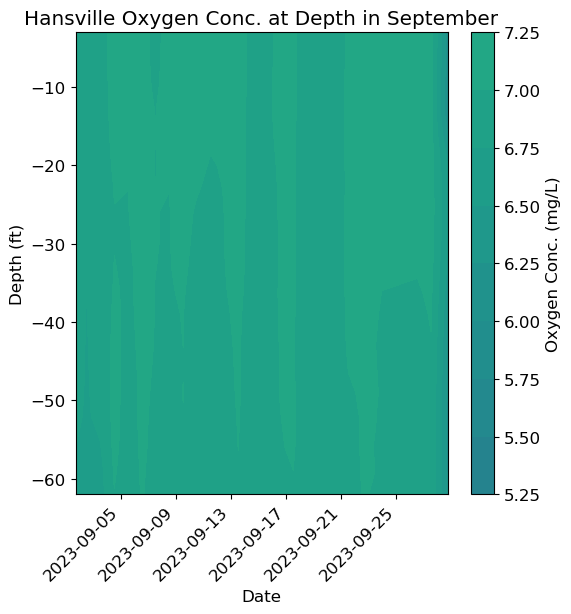

In [20]:
# Hansville Dissolved Oxygen Over Time and Depth

# Convert Datetime strings to Datetimes
# Create Empty List for Datetimes
datetimes = []
# Convert String to Datetime Object
for date in hansville_df['Date and Time']:
    datetimes.append(parser.parse(date))
# Subsets Datetimes to Dataframe
hansville_df['Datetime'] = datetimes

# Convert Depth to Int
hansville_df['Depth']= hansville_df['Depth'].astype(int)

# Create 2d Array of O2 Conc.
piv = pd.pivot_table(hansville_df, index='Depth', columns='Datetime', values=' Oxygen Conc. (mg/L)',sort = True)
piv_new = piv.to_numpy()

# Set X and Y
x= piv.columns
y= piv.index.values
X,Y = np.meshgrid(x,y)

#Plot 
fig,axs = plt.subplots(figsize = (6,6))
plt.contourf(X,Y,piv_new,vmin = 0,vmax = 12) # Added Vmin and Vmax to better compare the 4 plots against eachother.
# Set Axis Labels and Title
axs.set_xlabel('Date')
axs.set_ylabel('Depth (ft)')
axs.set_title('Hansville Oxygen Conc. at Depth in September')
# Tilt X Tic Values
plt.xticks(rotation=45, ha='right')
# Set Axis Limits based on known dataset
axs.set_xlim(left = datetime.fromisoformat('2023-09-02'), right = datetime.fromisoformat('2023-09-29'))
axs.set_ylim(top = -3, bottom = -62)
plt.show
# Add Color Bar
plt.colorbar(label = 'Oxygen Conc. (mg/L)')
# Save .png of plot
#plt.savefig('Hansville.png')

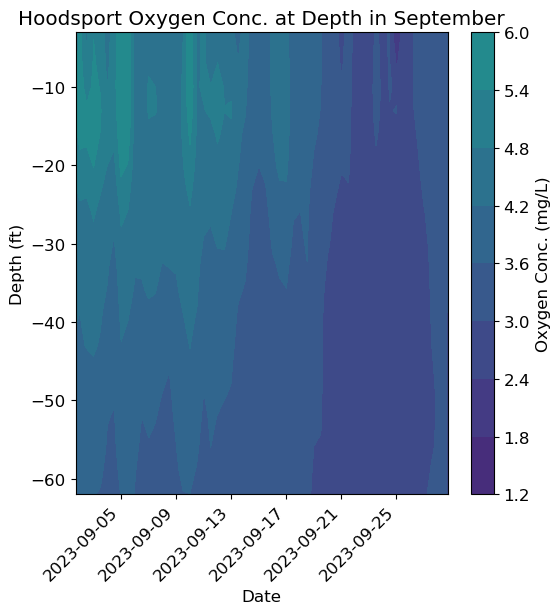

In [21]:
# Hoodsport Dissolved Oxygen Over Time and Depth

# Convert Datetime strings to Datetimes
# Create Empty List for Datetimes
datetimes = []
# Convert String to Datetime Object
for date in hoodsport_df['Date and Time']:
    datetimes.append(parser.parse(date))
# Subsets Datetimes to Dataframe
hoodsport_df['Datetime'] = datetimes

# Convert Depth to Int
hoodsport_df['Depth']= hoodsport_df['Depth'].astype(int)

# Create 2d Array of O2 Conc.
piv = pd.pivot_table(hoodsport_df, index='Depth', columns='Datetime', values=' Oxygen Conc. (mg/L)',sort = True)
piv_new = piv.to_numpy()

# Set X and Y
x= piv.columns
y= piv.index.values
X,Y = np.meshgrid(x,y)

#Plot 
fig,axs = plt.subplots(figsize = (6,6))
plt.contourf(X,Y,piv_new,vmin = 0,vmax = 12) # Added Vmin and Vmax to better compare the 4 plots against eachother. 
# Set Axis Labels and Title
axs.set_xlabel('Date')
axs.set_ylabel('Depth (ft)')
axs.set_title('Hoodsport Oxygen Conc. at Depth in September')
# Tilt X Tic Values
plt.xticks(rotation=45, ha='right')
# Set Axis Limits based on known dataset
axs.set_xlim(left = datetime.fromisoformat('2023-09-02'), right = datetime.fromisoformat('2023-09-29'))
axs.set_ylim(top = -3, bottom = -62)
plt.show
# Add Color Bar
plt.colorbar(label = 'Oxygen Conc. (mg/L)')
# Save .png of plot
#plt.savefig('Hoodsport.png')

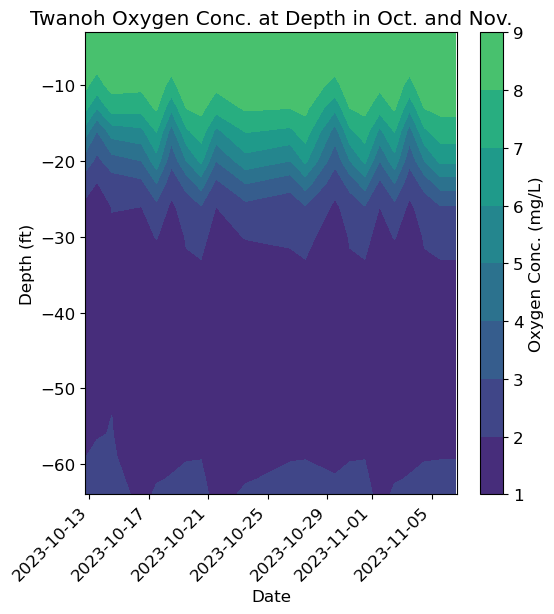

In [24]:
# Twanoh Dissolved Oxygen Over Time and Depth

# Convert Datetime strings to Datetimes
# Create Empty List for Datetimes
datetimes = []
# Convert String to Datetime Object
for date in twanoh_df['Date and Time']:
    datetimes.append(parser.parse(date))
# Subsets Datetimes to Dataframe
twanoh_df['Datetime'] = datetimes

# Convert Depth to Int
twanoh_df['Depth']= twanoh_df['Depth'].astype(int)

# Create 2d Array of O2 Conc.
piv = pd.pivot_table(twanoh_df, index='Depth', columns='Datetime', values=' Oxygen Conc. (mg/L)',sort = True)
piv_new = piv.to_numpy()

# Set X and Y
x= piv.columns
y= piv.index.values
X,Y = np.meshgrid(x,y)

#Plot 
fig,axs = plt.subplots(figsize = (6,6))
plt.contourf(X,Y,piv_new,vmin = 0,vmax = 12) # Added Vmin and Vmax to better compare the 4 plots against eachother.
# Set Axis Labels and Title
axs.set_xlabel('Date')
axs.set_ylabel('Depth (ft)')
axs.set_title('Twanoh Oxygen Conc. at Depth in Oct. and Nov.')
# Tilt X Tic Values
plt.xticks(rotation=45, ha='right')
# Set Axis Limits based on known dataset
axs.set_xlim(left = datetime.fromisoformat('2023-10-13'), right = datetime.fromisoformat('2023-11-07'))
axs.set_ylim(top = -3, bottom = -64)
plt.show
# Add Color Bar
plt.colorbar(label = 'Oxygen Conc. (mg/L)')
# Save .png of plot
#plt.savefig('Twanoh.png')